<a href="https://colab.research.google.com/github/7692TITO/EDA-CAPSTONE-PROJECT/blob/main/Eda_Project_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

1. when the best time of year to book a hotel room is? 
2. the optimal length of stay in order to get the best daily rate? 
3. What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 
4.factors that govern the bookings.

In [86]:
import numpy as np                              # Import all the libraries required for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
from google.colab import drive                 # Mount the Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings (1).csv')   # Syntax to read the csv file
                                                                        # df is the Dataframe name given to our dataset

In [89]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [75]:
df.shape

(119390, 32)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

## **1. Data Cleaning**

 a) Checking for data type

In [91]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [92]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d') #change the datatype of reservation status date to datetime

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

b) **Checking for missing values**

In [94]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

The following coulmns name company , agent , country  , children has null values in it.

b) **Filling the null values with adequate values**

In [96]:
df.drop(['company','agent'],axis=1, inplace= True) # drop AgentId and CompanyId Columns
df['country'].fillna('Not defined',inplace = True) # we use Not defined here because country is a object data type
df['children'].fillna(0 , inplace = True)

df.shape

(119390, 30)

In [ ]:
df

In [31]:
df.isna().sum()      # checking again to see whether all null values are filled or not

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

c) **Check for duplicate value rows**

In [98]:
df.duplicated().value_counts()

False    87370
True     32020
dtype: int64

We can see from above data that we have 31994 rows with duplicate values.We will remove duplicate values now

In [99]:
df.drop_duplicates(inplace=True)    # syntax to remove duplicate values

In [100]:
df.duplicated().value_counts()      # Hence we have removed all the duplicate values from the row

False    87370
dtype: int64

In [101]:
df.shape

(87370, 30)

**d) Check for Outliers**

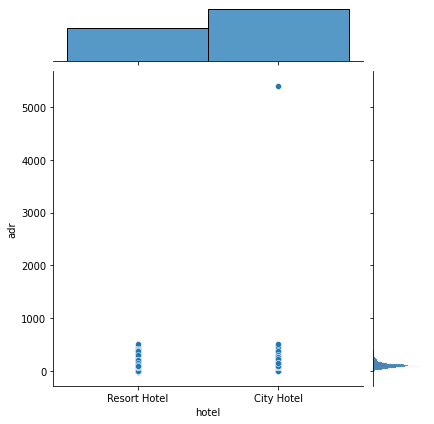

In [102]:
sns.jointplot(x='hotel', y='adr', data= df)

We have found an outlier in adr data,hence we will try to remove it inorder to do a better data analysis process.

In [104]:
df.drop(df[df['adr'] > 5000].index, inplace = True)   #Removing outliers from the adr data

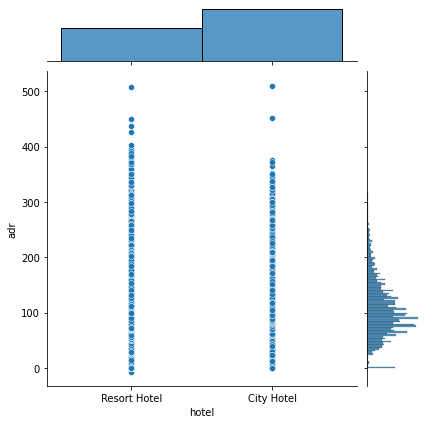

In [105]:
sns.jointplot(x='hotel', y='adr', data= df)

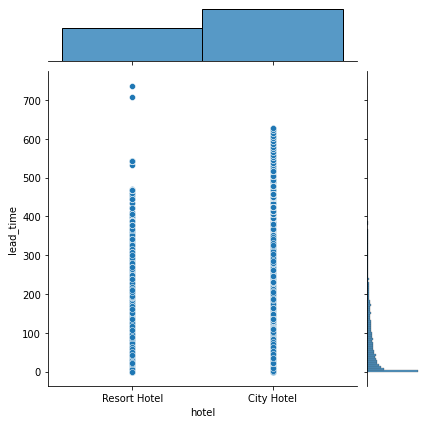

In [106]:
sns.jointplot(x='hotel', y='lead_time', data= df)

We have found some outliers above 650 range in Resort Hotel ,we will drop them for better data analysis

In [107]:
df.drop(df[df['lead_time']> 650].index,inplace=True)                  #Removing outliers from the lead time data

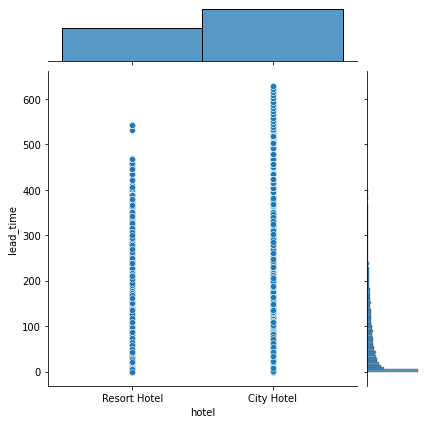

In [108]:
sns.jointplot(x='hotel', y='lead_time', data= df)

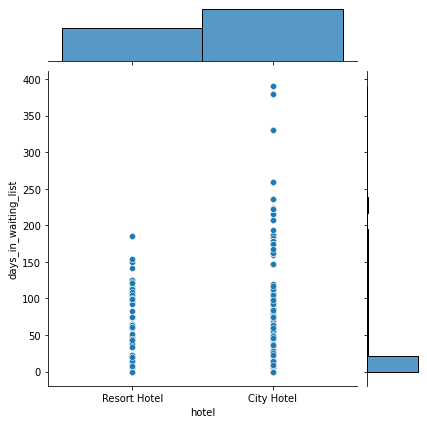

In [109]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= df)

We have found some outliers above 300 range in City Hotel ,we will drop them for better data analysis

In [110]:
df.drop(df[df['days_in_waiting_list']> 300].index,inplace=True)        #Removing outliers from the days_in_waiting_list column 

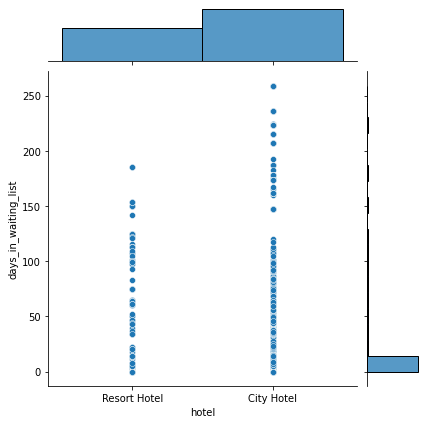

In [111]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= df)

In [112]:
df.shape

(87355, 30)

## **Exploratory Data Analysis**

## **Question No-1**
## **Which distribution channel brings better revenue generating deals for hotels?** 


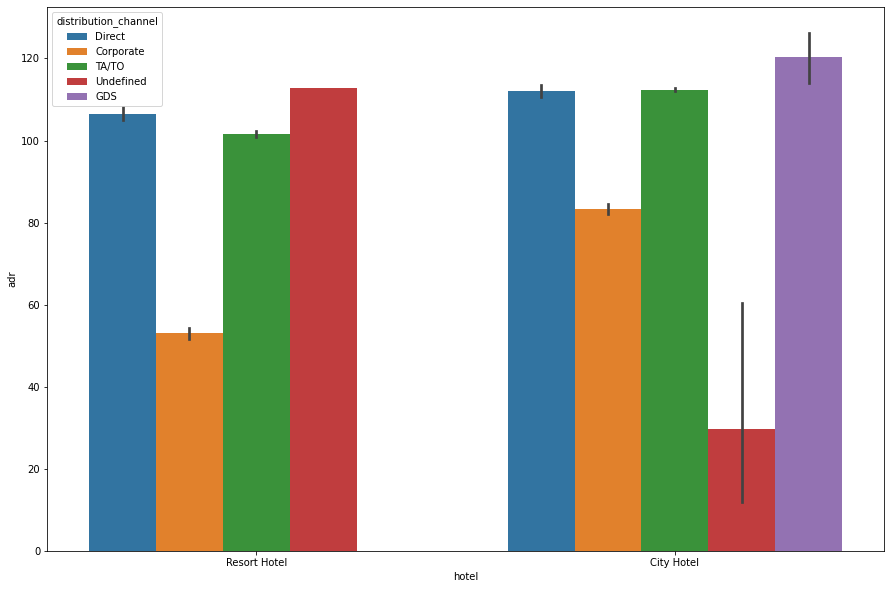

In [156]:
plt.figure(figsize = (15,10))
sns.barplot(x= 'hotel' ,y ='adr',hue ='distribution_channel' ,data= df)




# Conclusion : 
The above bar plot depicts that the GDS channel as the highest revenue generating deals for City Hotels. On the otherhand for Resort hotel Direct and TA/TO channels brings better deals. Hence increasing the number of booking using GDS channel in City Hotel will increase the revenue of the City Hotel

# **Question No-2**
## **Factor affecting Cancellation rate** 

##  **Distribution Channel with highest cancellation**

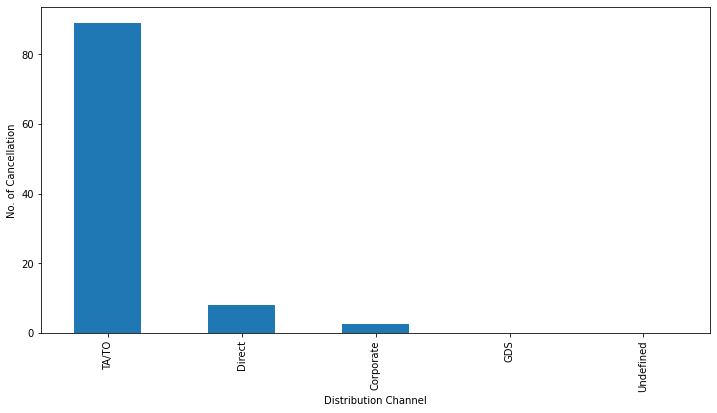

In [114]:
cond = df[df['is_canceled']==1]
channel =  (cond['distribution_channel'].value_counts()/cond['distribution_channel'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
channel.plot(kind = 'bar')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

We see that TA/TO channel has the highest rate of cancellation compared to other distribution channels. 
Let us see what is the reason behind this cancellation and check  what all parameters are related to Cancellation Rate.

## **a) Waiting time(days)**

In [115]:
waiting_list= df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time




In [116]:
waiting_list.shape

(848, 30)

In [117]:
cancellation = (waiting_list.groupby('is_canceled')['days_in_waiting_list'].count()/ waiting_list['days_in_waiting_list'].size)*100
cancellation


is_canceled
0    66.15566
1    33.84434
Name: days_in_waiting_list, dtype: float64

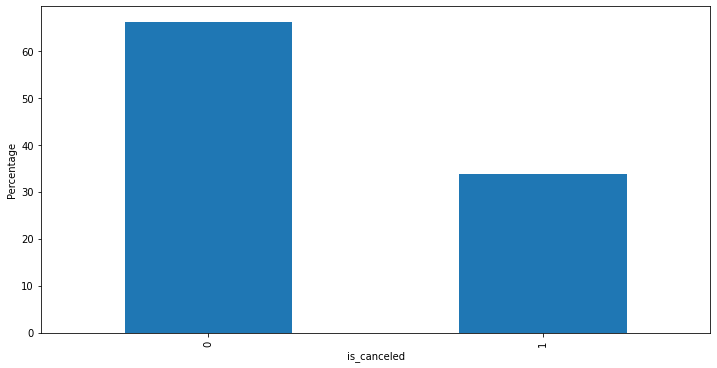

In [118]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation.plot(kind = 'bar')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

### **Result**
The above bar plot tells you that the percentage of bookings canceled due to longer waiting time is compartively low. Even if there is waiting time for booking , around 65% of booking not canceled,therefore we can conclude that waiting period has no effect on cancellation of bookings

## **b) Lead Time**

In [119]:
cancellation1 = (df.groupby('is_canceled')['lead_time'].count()/df['lead_time'].size)*100
cancellation1

is_canceled
0    72.511018
1    27.488982
Name: lead_time, dtype: float64

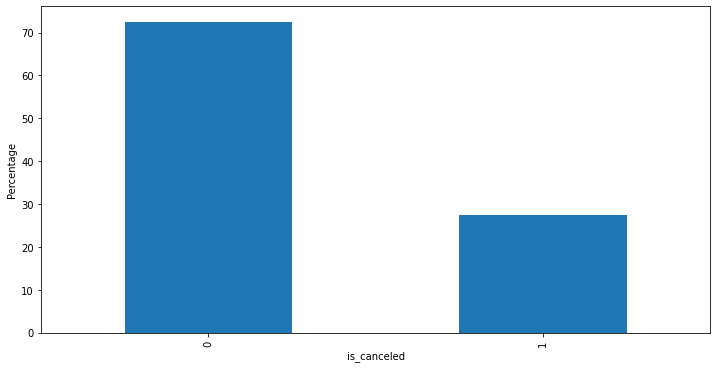

In [120]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation1.plot(kind = 'bar')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

### **Result**
The above bar plot tells you that the percentage of bookings canceled due to lead time is compartively very low. Nearly 72% of booking not canceled,therefore we can conclude that Lead Time has no effect on cancellation of bookings

## c)**Whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings**

In [121]:
def room(x):
  if x['assigned_room_type'] != x['reserved_room_type']:
    return 1
  else:
    return 0


In [122]:
df['allotted_same_room'] = df.apply(lambda x : room(x) ,axis=1)

In [123]:
room = (df.groupby('is_canceled')['allotted_same_room'].sum()/df['is_canceled'].size)*100
room


is_canceled
0    14.293400
1     0.705169
Name: allotted_same_room, dtype: float64

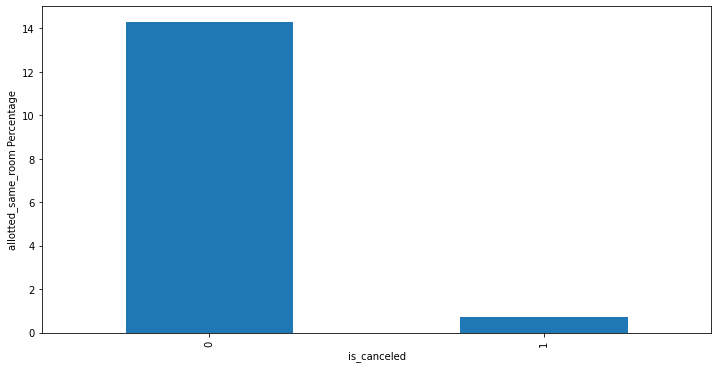

In [124]:
plt.rcParams['figure.figsize'] = (12,6)
room.plot(kind = 'bar')
plt.ylabel('allotted_same_room Percentage')
plt.xlabel('is_canceled')
plt.show()

# **Result**
The above bar plot tells you that the percentage of bookings canceled due to not assigning same room is compartively very low. There were no significant number of booking  canceled due to not allocating the same room . Therefore we can conclude that not assigning the same room has no effect on cancellation of bookings

## **d) Car parking space**

In [125]:
new_df1 = df[df['is_canceled'] == 1]            #segregation of actual canceled data from is_canceled column
new_df1['is_canceled'].value_counts()

1    24013
Name: is_canceled, dtype: int64

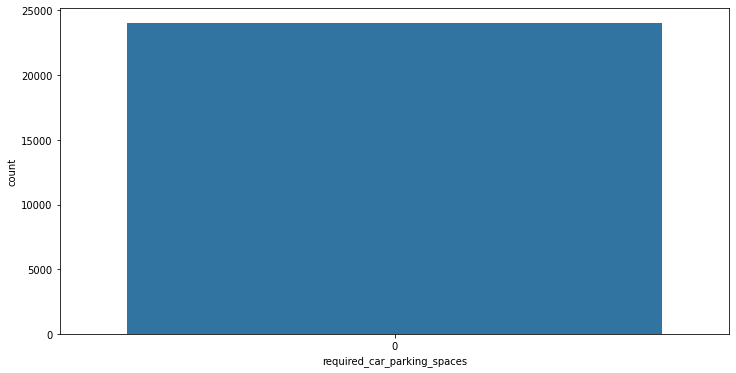

In [126]:
sns.countplot(x='required_car_parking_spaces',data = new_df1)

### **Result** 
When we have gone through analysis of actual canceled data analysis(new_df1),we find that the required_car_space column name has only value 0 in its entire rows.All the canceled booking has assigned zero parking space,not a single car parking space alloted in the booking. Hence we can conclude from this analysis that one prime reason behind cancellation will be due to no car parking space.

# **Conclusion**
1. We can conclude from our above analysis that the one prime reason behind booking cancellation is due to no availability of car parking space for the canceled booking.
2. The other parameters like lead time and days in waiting list have no significant impact on the cancellation rate.
3. We have also see from our analysis that the booking change from assigned room to reserved room parameter  not had any influence on cancellation of bookings.


## **Question No-3**
## **Factors Governing Booking**

## **a) Deposit type**

In [127]:
new_df = df[df['is_canceled'] == 0]                      # segregation of actual guest who doesn't canceled their bookings from is_canceled column
new_df.shape

(63342, 31)

In [128]:
factor1 = (new_df['deposit_type'].value_counts() /new_df['deposit_type'].size)*100

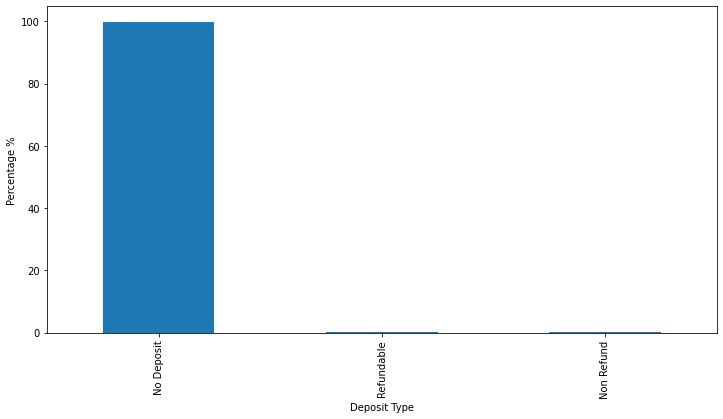

In [129]:
plt.rcParams['figure.figsize'] = (12,6)
factor1.plot(kind = 'bar')
plt.ylabel('Percentage %')
plt.xlabel('Deposit Type')
plt.show()

### **Result**
The most number of guests while booking the room prefer the deposit type with No Deposit option(Above 90%). Hence we can conclude from the the above barplot that inorder to increase the number of booking ,the hotel should plan to provide No 
Deposit type option to their customers.

## **b) Room Type Assigned**

Room type which will generate highest revenue for hotel

In [130]:
factor2 = new_df.groupby(['assigned_room_type'])['adr'].mean()

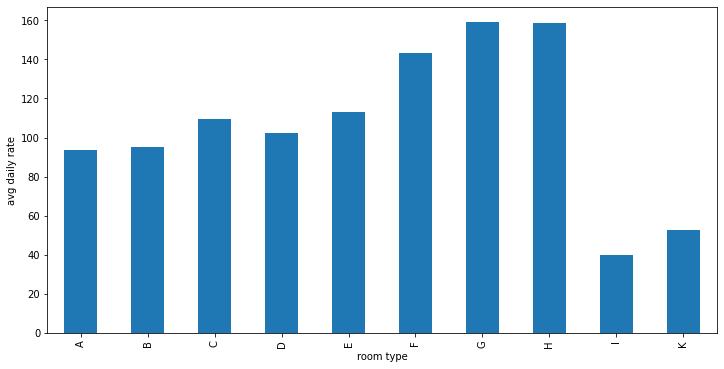

In [131]:
plt.rcParams['figure.figsize'] = (12,6)
factor2.plot(kind = 'bar')
plt.ylabel('avg daily rate')
plt.xlabel('room type')
plt.show()

### **Result**
The hotel can gain most of its revenue from Room type-G & H,since these two room type have the highest average daily rate. Inorder to increase the sale in these two room type ,the hotel should provide the guest with good deals.

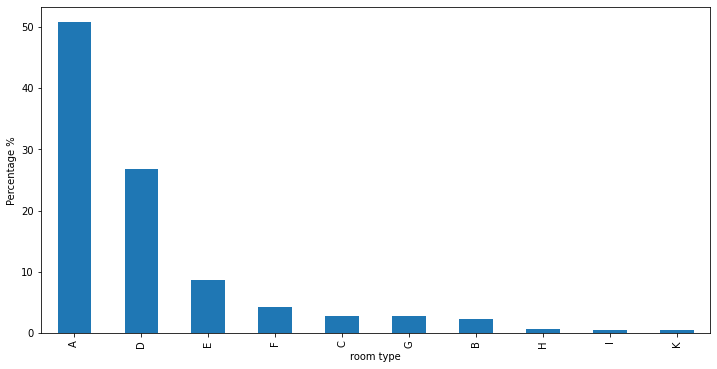

In [132]:
x = (new_df['assigned_room_type'].value_counts()/new_df['assigned_room_type'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
x.plot(kind = 'bar')
plt.ylabel('Percentage %')
plt.xlabel('room type')
plt.show()

### **Result**
The above bar plot conveys that Room type A has the highest number of bookings compared to the other room type,secondly in demand is room type D.Hence inorder to increase their sales the hotels should provide the guest with these room type A and D always vacant and available.

## **c) Customer Type**

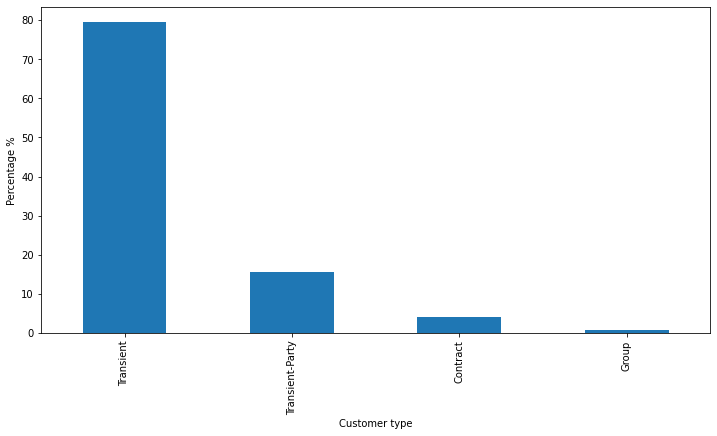

In [133]:
factor3 = (new_df['customer_type'].value_counts()/new_df['customer_type'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
factor3.plot(kind = 'bar')
plt.ylabel('Percentage %')
plt.xlabel('Customer type')
plt.show()

### **Result**
Another important factor which governs the booking is the Customer Type.The above plot clearly depicts more than 75% of booking has been carried out by Transient Customer Type and  less than 5% of booking has been done by group customer type.

## **d) Hotel Type**

In [134]:
factor4 = (new_df['hotel'].value_counts()/new_df['hotel'].size)*100

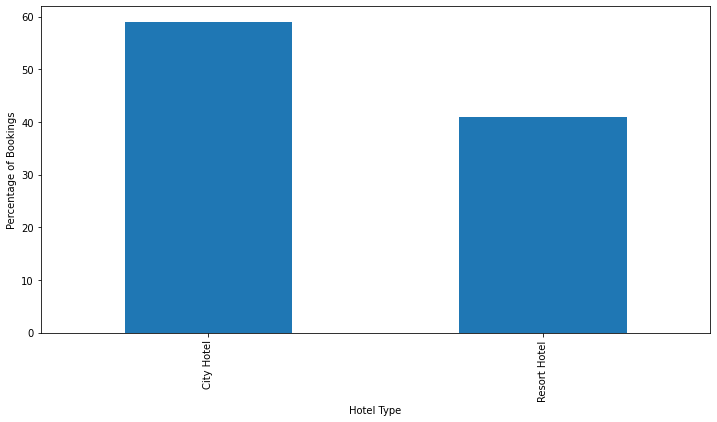

In [135]:
plt.rcParams['figure.figsize'] = (12,6)
factor4.plot(kind = 'bar')
plt.ylabel('Percentage of Bookings')
plt.xlabel('Hotel Type')
plt.show()

### **Result**
Another primary factor which governing the booking is the hotel preference by the customer. The above barplot depicts nearly 60% of guests prefer City Hotel and only 40% of guest prefer Resort Hotel

## **e) Total number of days stays**

In [136]:
new_df['total_stay'] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
factor5 = (new_df['total_stay'].value_counts()[:15]/new_df['total_stay'].size)*100


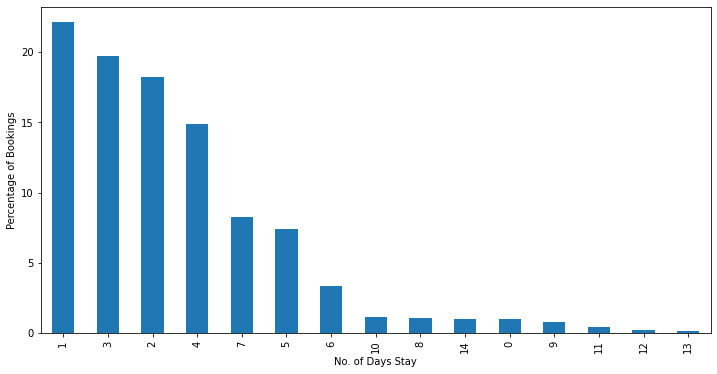

In [138]:
plt.rcParams['figure.figsize'] = (12,6)
factor5.plot(kind = 'bar')
plt.ylabel('Percentage of Bookings')
plt.xlabel('No. of Days Stay')
plt.show()

### **Result**
The number of days stay prefered by most number of customers is 1 day with nearly 25% ,secondly the prefered no. of days stay is 3 days.

## **f)Total Number of Guest** 

In [139]:
new_df['total_no_guest'] = new_df['adults']+new_df['children']+new_df['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
factor6 = (new_df['total_no_guest'].value_counts()/new_df['total_no_guest'].size)*100


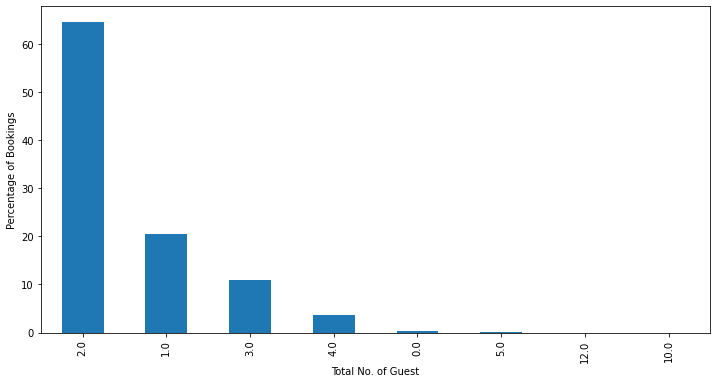

In [141]:
plt.rcParams['figure.figsize'] = (12,6)
factor6.plot(kind = 'bar')
plt.ylabel('Percentage of Bookings')
plt.xlabel('Total No. of Guest')
plt.show()

### **Result**
The total number of guest is another prime factor governing the bookings. We can conclude from the above barplot that most number of bookings are done by couples.Hence providing good deals for couples can increase the number of bookings

## **Question No-4** 
## **What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests**

## **a)Special Request According to Adults**

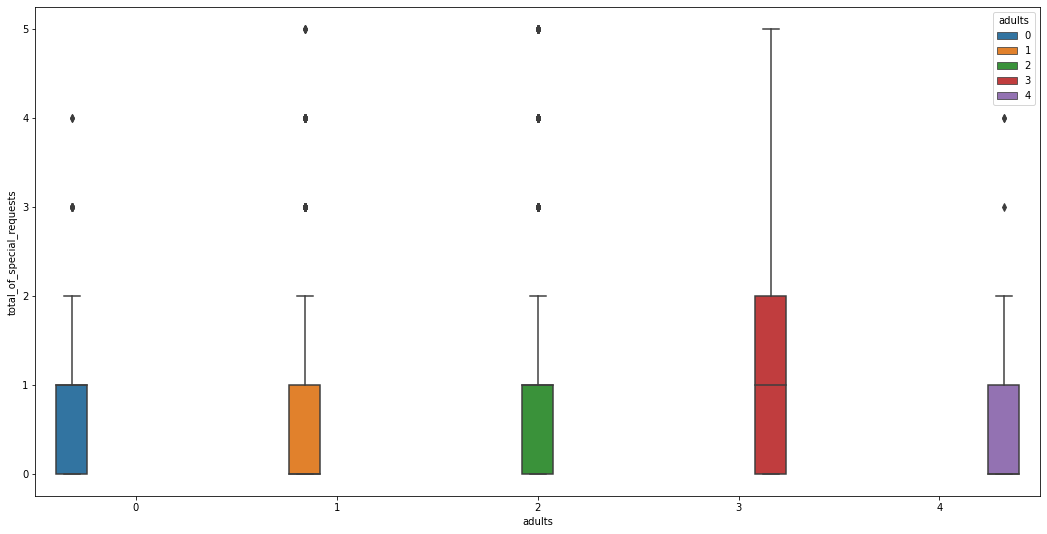

In [142]:
sns.boxplot(x = 'adults' , y= 'total_of_special_requests' ,hue = 'adults', data = new_df)
fig = plt.gcf()
fig.set_size_inches(18,9)

### **Result**
The above boxplot depicts that the most number of special request is made when the number of adults are 3. Hence the hotel can predict the special request based on the above plot easily and can take necessary  steps to curb the number of special request

## **b)Special Request According to Market Segmentation**

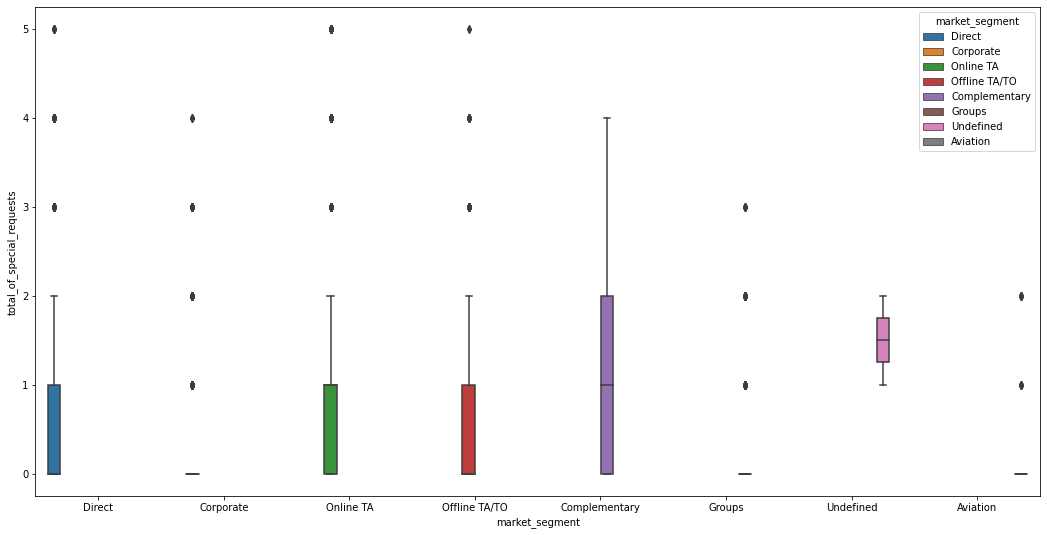

In [143]:
sns.boxplot(x ='market_segment' , y='total_of_special_requests', hue='market_segment',data =df)
fig = plt.gcf()
fig.set_size_inches(18,9)

### **Result**
The above boxplot depicts that the most number of special request  made by various market segment. The most number of special request will be asked from Complementary market segment. Hence the hotel can predict the special request based on the above plot easily and can take adequate steps to reduce the number of special request

## **c)Special Request According to Kids**

In [144]:
new_df['kids'] = new_df['children'] + new_df['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


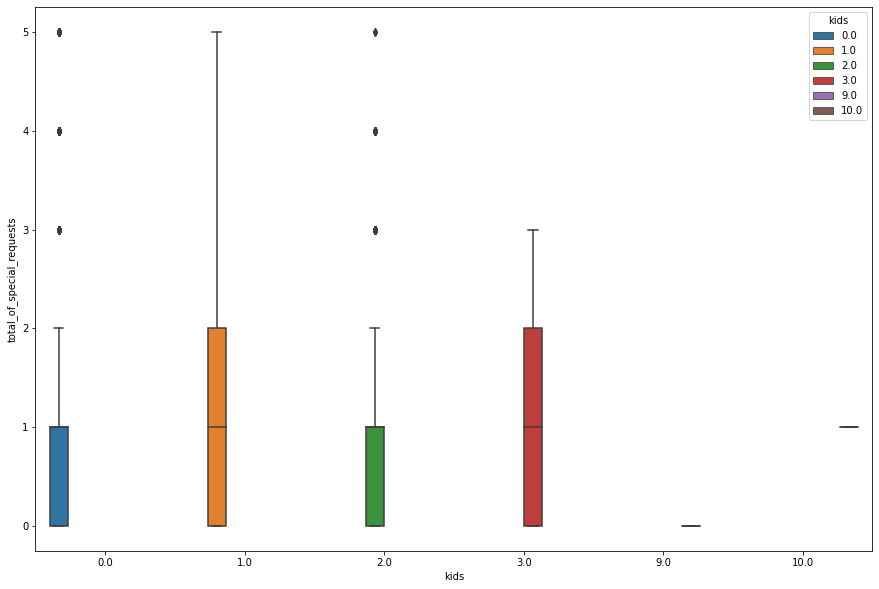

In [145]:
sns.boxplot(x ='kids' , y='total_of_special_requests',hue = 'kids' , data = new_df)
fig = plt.gcf()
fig.set_size_inches(15,10)

### **Result**
The above boxplot depicts that the most number of special request is made when the number of kids are 1 or 3. Hence the hotel can predict the special request based on the above plot easily and can take proper steps to reduce the number of special request